<a href="https://colab.research.google.com/github/manishaotlamgari/Phishing_website/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Phishing/data/urldata.csv.zip'
extract_path = '/content/drive/MyDrive/Phishing/data/urldata.csv'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete.")


✅ Extraction complete.


In [ ]:
%cd /content/drive/MyDrive/Phishing/data

/content/drive/MyDrive/Phishing/data


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


''

In [ ]:
import pandas as pd

# Loading the downloaded dataset
df = pd.read_csv("/content/drive/MyDrive/Phishing/data/urldata.csv/urldata.csv")
df.head(10)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
5,5,https://www.reddit.com,benign,0
6,6,https://www.yahoo.com,benign,0
7,7,https://www.google.co.in,benign,0
8,8,https://www.qq.com,benign,0
9,9,https://www.amazon.com,benign,0


In [ ]:
#Removing the unnamed columns as it is not necesary.
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
5,https://www.reddit.com,benign,0
6,https://www.yahoo.com,benign,0
7,https://www.google.co.in,benign,0
8,https://www.qq.com,benign,0
9,https://www.amazon.com,benign,0


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [ ]:
df.shape

(450176, 3)

In [ ]:

# Printing number of legit and fraud domain urls
df["label"].value_counts()

,count
label,
benign,345738
malicious,104438


In [ ]:
#Importing dependencies
from urllib.parse import urlparse
import os.path

# changing dataframe variable
urldata = df


In [ ]:
from urllib.parse import urlparse

def extract_url_features(url):
    try:
        parsed_url = urlparse(url)
        hostname_length = len(parsed_url.netloc)
        path_length = len(parsed_url.path)
        url_length = len(url)
        # Extract first directory from path
        path_parts = parsed_url.path.split('/')
        fd_length = len(path_parts[1]) if len(path_parts) > 1 and path_parts[1] else 0
    except Exception:
        hostname_length = 0
        path_length = 0
        url_length = 0
        fd_length = 0

    return pd.Series([hostname_length, path_length, url_length, fd_length])

# Apply the feature extraction
urldata[['hostname_length', 'path_length', 'url_length', 'fd_length']] = urldata['url'].apply(extract_url_features)


In [ ]:

# printing first few rows
urldata.head(10)

,url,label,result,hostname_length,path_length,url_length,fd_length
0,https://www.google.com,benign,0,14,0,22,0
1,https://www.youtube.com,benign,0,15,0,23,0
2,https://www.facebook.com,benign,0,16,0,24,0
3,https://www.baidu.com,benign,0,13,0,21,0
4,https://www.wikipedia.org,benign,0,17,0,25,0
5,https://www.reddit.com,benign,0,14,0,22,0
6,https://www.yahoo.com,benign,0,13,0,21,0
7,https://www.google.co.in,benign,0,16,0,24,0
8,https://www.qq.com,benign,0,10,0,18,0
9,https://www.amazon.com,benign,0,14,0,22,0


In [ ]:

# Count of how many times a special character appearsin url

urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [ ]:


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [ ]:

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [ ]:
from urllib.parse import urlparse

def no_of_dir(url):
    try:
        urldir = urlparse(url).path
        return urldir.count('/')
    except Exception:
        return 0

# Apply it safely
urldata['count_dir'] = urldata['url'].apply(no_of_dir)


In [ ]:

# printing first few rows
urldata.head(10)

,url,label,result,hostname_length,path_length,url_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,14,0,22,0,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,15,0,23,0,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,16,0,24,0,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,13,0,21,0,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,17,0,25,0,0,0,0,0,2,0,1,1,1,0,20,0
5,https://www.reddit.com,benign,0,14,0,22,0,0,0,0,0,2,0,1,1,1,0,17,0
6,https://www.yahoo.com,benign,0,13,0,21,0,0,0,0,0,2,0,1,1,1,0,16,0
7,https://www.google.co.in,benign,0,16,0,24,0,0,0,0,0,3,0,1,1,1,0,18,0
8,https://www.qq.com,benign,0,10,0,18,0,0,0,0,0,2,0,1,1,1,0,13,0
9,https://www.amazon.com,benign,0,14,0,22,0,0,0,0,0,2,0,1,1,1,0,17,0


In [ ]:

import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
        '([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [ ]:
# use of url shortening service
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [ ]:

# printing first few rows
urldata.head(10)

,url,label,result,hostname_length,path_length,url_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,14,0,22,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,15,0,23,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,16,0,24,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,13,0,21,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,17,0,25,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1
5,https://www.reddit.com,benign,0,14,0,22,0,0,0,0,...,2,0,1,1,1,0,17,0,1,-1
6,https://www.yahoo.com,benign,0,13,0,21,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
7,https://www.google.co.in,benign,0,16,0,24,0,0,0,0,...,3,0,1,1,1,0,18,0,1,1
8,https://www.qq.com,benign,0,10,0,18,0,0,0,0,...,2,0,1,1,1,0,13,0,1,1
9,https://www.amazon.com,benign,0,14,0,22,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1


In [ ]:

# printing info about current dataset
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450176 non-null  object
 1   label            450176 non-null  object
 2   result           450176 non-null  int64 
 3   hostname_length  450176 non-null  int64 
 4   path_length      450176 non-null  int64 
 5   url_length       450176 non-null  int64 
 6   fd_length        450176 non-null  int64 
 7   count-           450176 non-null  int64 
 8   count@           450176 non-null  int64 
 9   count?           450176 non-null  int64 
 10  count%           450176 non-null  int64 
 11  count.           450176 non-null  int64 
 12  count=           450176 non-null  int64 
 13  count-http       450176 non-null  int64 
 14  count-https      450176 non-null  int64 
 15  count-www        450176 non-null  int64 
 16  count-digits     450176 non-null  int64 
 17  count-lett

In [ ]:
urldata.to_csv("Url_Processed.csv")

In [ ]:

urldata.head()

,url,label,result,hostname_length,path_length,url_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,14,0,22,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,15,0,23,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,16,0,24,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,13,0,21,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,17,0,25,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


In [ ]:

# remove uneccessary columns
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,hostname_length,path_length,url_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,14,0,22,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1
1,0,15,0,23,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1
2,0,16,0,24,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1
3,0,13,0,21,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1
4,0,17,0,25,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1


In [ ]:
#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

In [ ]:

# printing x
x.head()

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1
1,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1
2,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1
3,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1
4,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1


In [ ]:

# printing y
y.head()


,result
0,0
1,0
2,0
3,0
4,0


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_sample, y_sample = smote.fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.Series(y_sample)


In [ ]:

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 16)
Size of y-sample : (691476,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180,)
Shape of y_valid:  (138296,)


In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=7)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.998
Accuracy on Testing dataset :  0.997


In [ ]:

# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69379
   malicious       1.00      1.00      1.00     68917

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



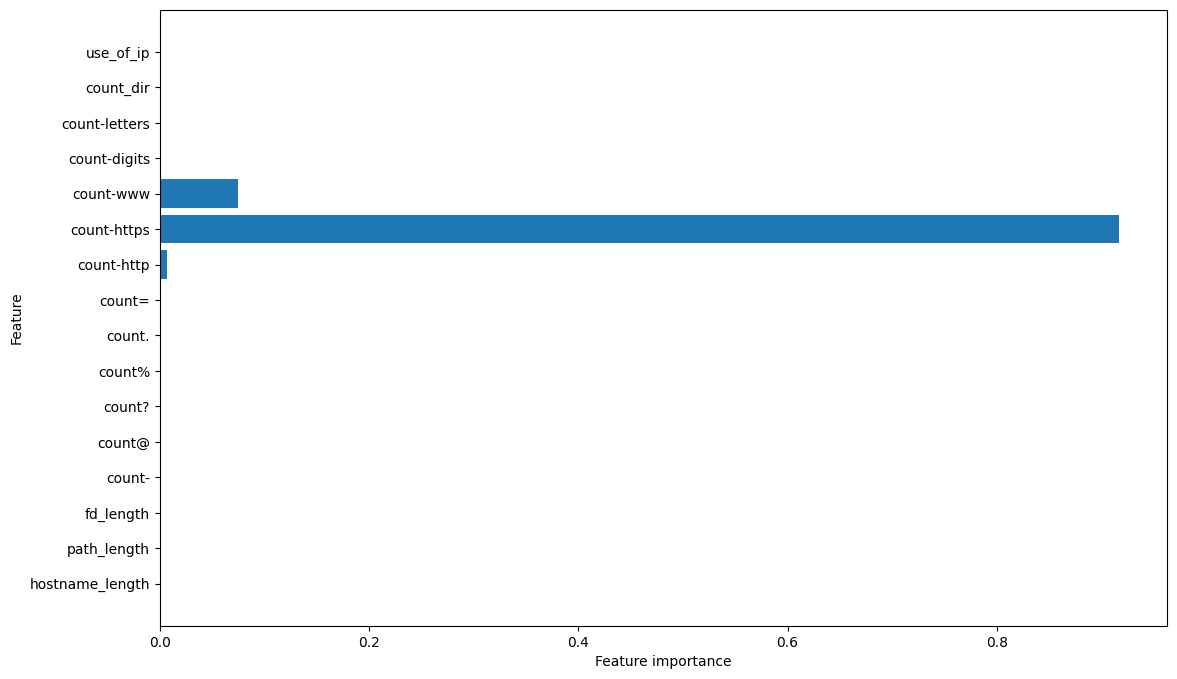

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#RANDOM CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=7)

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.997
Accuracy on Testing dataset :  0.997


In [ ]:

# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69381
   malicious       1.00      1.00      1.00     68915

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



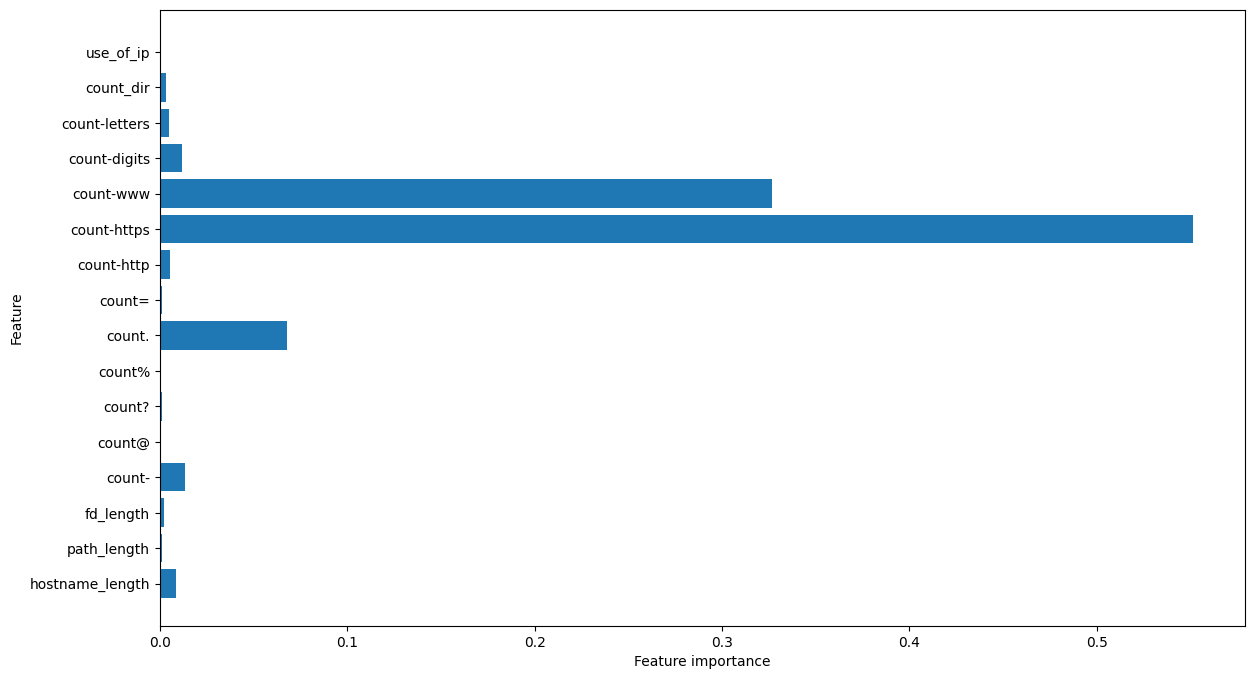

In [ ]:
feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#MULTILAYER PERCEPTRON
#A multilayer perceptron (MLP) is a feedforward artificial neural network
# that generates a set of outputs from a set of inputs. An MLP is characterized by several
# layers of input nodes connected as a
#directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:

# print input shape
x_train.shape

(553180, 16)

In [ ]:

# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow import keras

# compiling model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


In [ ]:

# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

In [ ]:
# start training the model
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)


Epoch 1/10
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.7037 - loss: 0.8735 - val_acc: 0.9397 - val_loss: 0.2827
Epoch 2/10
2145/2161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9564 - loss: 0.2107
Reached 0.1 val_loss so cancelling training!
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.9565 - loss: 0.2103 - val_acc: 0.9896 - val_loss: 0.0629


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


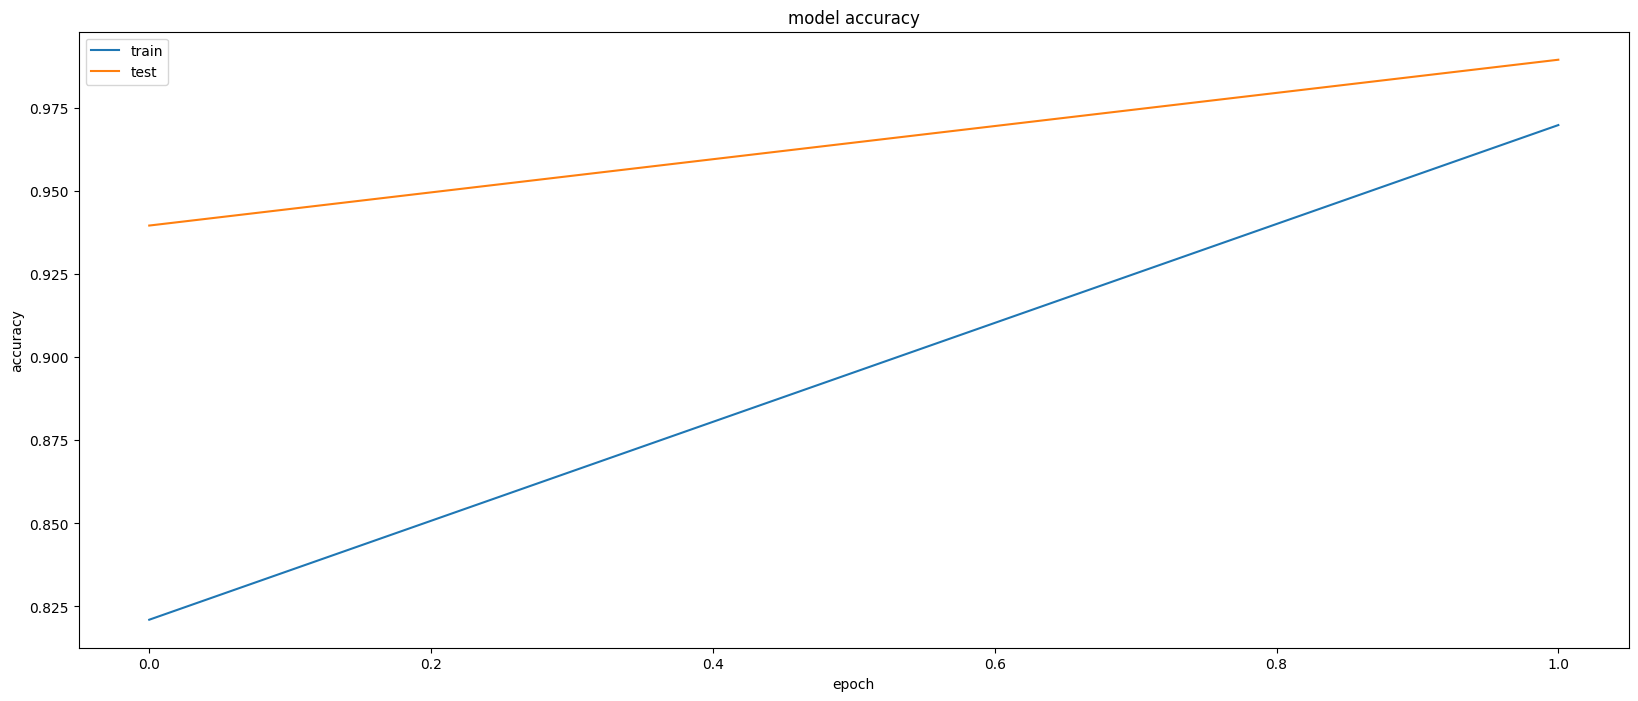

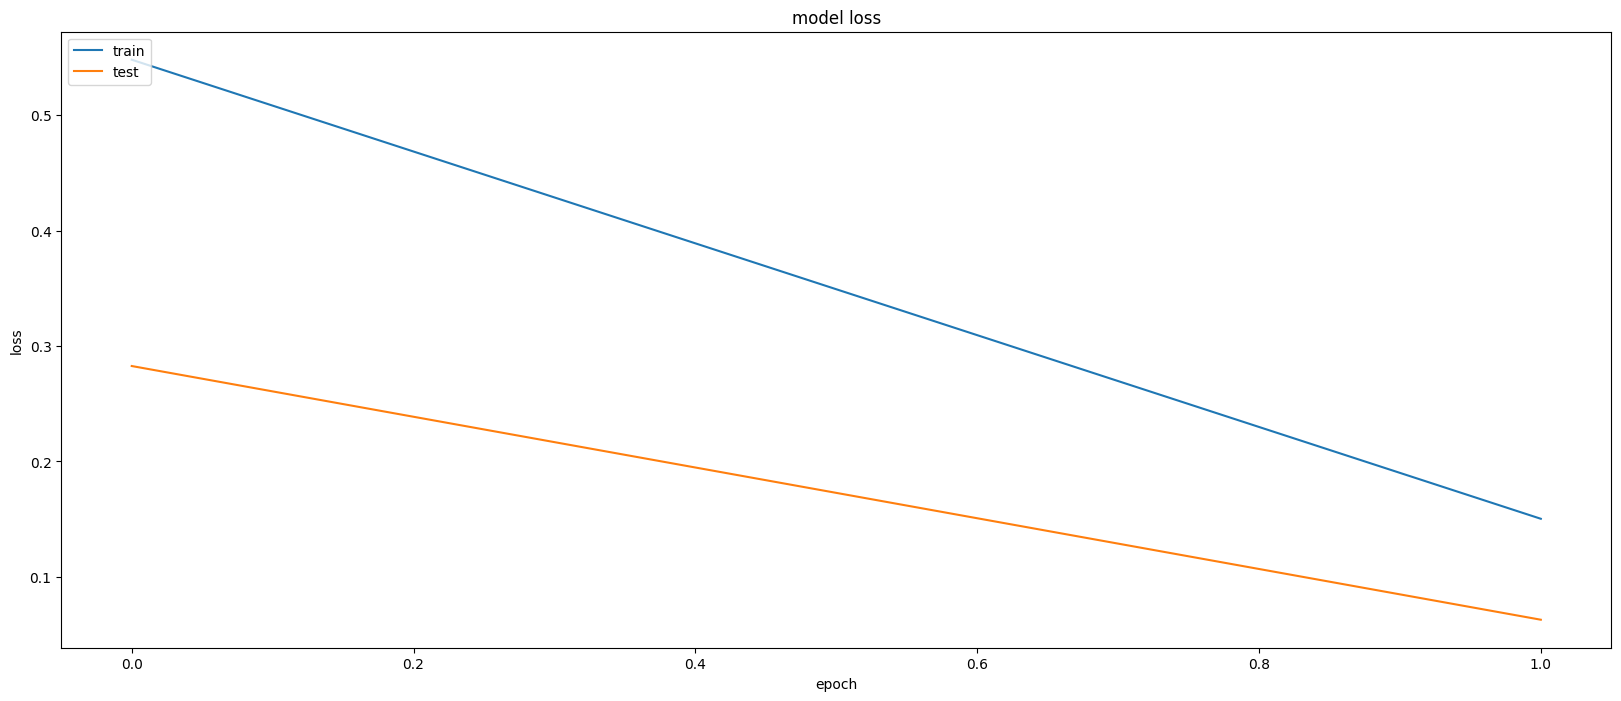

In [ ]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:

# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

4322/4322 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - acc: 0.9903 - loss: 0.0615
Test loss: 0.06293556094169617
Test Accuracy: 0.9896092414855957


In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])


4322/4322 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
PREDICTED : 
Non Mallicious
Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious


ACTUAL : 
Non Mallicious
Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious


In [ ]:

# Save Model Weights and Architecture Together
model.save("Malicious_URL_Prediction.h5")